In [108]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from utils import figure_8
from utils import net

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [110]:
#number of points per datasets
number_points = 500

#List of variances 
variances = np.arange(30,40,0.5)

#List of datasets for training
train_datasets = []
for var in variances :
    train_datasets.append(figure_8(number_points, var))

#List of datasets for testing
test_datasets = []
for var in variances :
    test_datasets.append(figure_8(number_points, var))

#List of nets for training
nets_ADAM = []
for var in variances:
    nets_ADAM.append(net().to(device))

nets_ASAM = []
for var in variances:
    nets_ASAM.append(net().to(device))

nets_SAM = []
for var in variances:
    nets_SAM.append(net().to(device))

In [111]:
epochs = 1500
generalization_errors = []
generalization_errors_ASAM = []

for net, train_dataset, test_dataset in zip(nets_ASAM, train_datasets, test_datasets):
    
    #Train 
    net.ASAM_train(train_dataset.get_dataset(), epochs)

    #Test error (with another dataset drawn from same distribution)
    generalization_errors_ASAM.append(net.test(test_dataset.get_dataset()))


for net, train_dataset, test_dataset in zip(nets_ADAM, train_datasets, test_datasets):
    
    #Train 
    net.train(train_dataset.get_dataset(), epochs)

    #Test error (with another dataset drawn from same distribution)
    generalization_errors.append(net.test(test_dataset.get_dataset()))

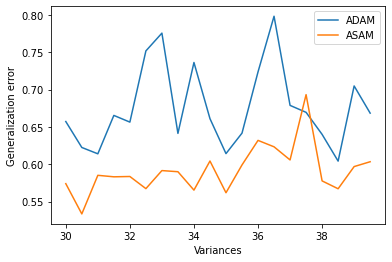

In [112]:
plt.plot(variances, generalization_errors, label='ADAM')
plt.plot(variances, generalization_errors_ASAM, label='ASAM')
plt.xlabel('Variances')
plt.ylabel('Accuracy')
plt.legend()

plt.show()